In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import KNNImputer
# from mod.unique_value import checking_unique_value

In [3]:
def checking_unique_value(df):
    unique_values = [df[col].nunique() for col in df]
    for col, values in zip(df.columns, unique_values):
        print(f"Unique values in column '{col}': {values}")

# Change in Mean Sea Levels

In [4]:
change_in_mean_sea_level_df = pd.read_csv('./Change_in_Mean_Sea_Levels.csv')
change_in_mean_sea_level_df = pd.DataFrame(change_in_mean_sea_level_df)
change_in_mean_sea_level_df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,D12/17/1992,-10.34
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,D12/17/1992,-18.46
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,D12/17/1992,-15.41
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,D12/17/1992,196.85
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,D12/17/1992,3.27


In [5]:
change_in_mean_sea_level_df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Measure', 'Date',
       'Value'],
      dtype='object')

In [6]:
change_in_mean_sea_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             35604 non-null  int64  
 1   Country              35604 non-null  object 
 2   ISO2                 0 non-null      float64
 3   ISO3                 35604 non-null  object 
 4   Indicator            35604 non-null  object 
 5   Unit                 35604 non-null  object 
 6   Source               35604 non-null  object 
 7   CTS_Code             35604 non-null  object 
 8   CTS_Name             35604 non-null  object 
 9   CTS_Full_Descriptor  35604 non-null  object 
 10  Measure              35604 non-null  object 
 11  Date                 35604 non-null  object 
 12  Value                35604 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.5+ MB


In [7]:
change_in_mean_sea_level_df.describe().round(2)

,ObjectId,ISO2,Value
count,35604.00,0.0,35604.00
mean,17802.50,NaN,25.98
std,10278.13,NaN,62.78
min,1.00,NaN,-401.85
25%,8901.75,NaN,-8.55
50%,17802.50,NaN,23.10
75%,26703.25,NaN,58.48
max,35604.00,NaN,504.95


In [8]:
checking_unique_value(change_in_mean_sea_level_df)

Unique values in column 'ObjectId': 35604
Unique values in column 'Country': 1
Unique values in column 'ISO2': 0
Unique values in column 'ISO3': 1
Unique values in column 'Indicator': 5
Unique values in column 'Unit': 1
Unique values in column 'Source': 1
Unique values in column 'CTS_Code': 1
Unique values in column 'CTS_Name': 1
Unique values in column 'CTS_Full_Descriptor': 1
Unique values in column 'Measure': 25
Unique values in column 'Date': 3653
Unique values in column 'Value': 16831


In [9]:
change_in_mean_sea_level_df['Indicator'].unique()

array(['Change in mean sea level: Sea level: TOPEX.Poseidon',
       'Change in mean sea level: Sea level: Jason.1',
       'Change in mean sea level: Sea level: Jason.2',
       'Change in mean sea level: Sea level: Jason.3',
       'Change in mean sea level: Sea level: Trend'], dtype=object)

#### Indicator column indicates the label of the satellite altimeters which recorded the datas

In [10]:
columns_to_drop = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
df = change_in_mean_sea_level_df.drop(columns=columns_to_drop, axis='columns')

In [11]:
df.head()

,Indicator,Unit,Measure,Date,Value
0,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,Andaman Sea,D12/17/1992,-10.34
1,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,Arabian Sea,D12/17/1992,-18.46
2,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,Atlantic Ocean,D12/17/1992,-15.41
3,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,Baltic Sea,D12/17/1992,196.85
4,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,Bay Bengal,D12/17/1992,3.27


In [12]:
# Assuming df is your DataFrame
df['Indicator'] = df['Indicator'].str.replace('Change in mean sea level: Sea level: ', '')

In [13]:
df.shape

(35604, 5)

In [14]:
df.head()

,Indicator,Unit,Measure,Date,Value
0,TOPEX.Poseidon,Millimeters,Andaman Sea,D12/17/1992,-10.34
1,TOPEX.Poseidon,Millimeters,Arabian Sea,D12/17/1992,-18.46
2,TOPEX.Poseidon,Millimeters,Atlantic Ocean,D12/17/1992,-15.41
3,TOPEX.Poseidon,Millimeters,Baltic Sea,D12/17/1992,196.85
4,TOPEX.Poseidon,Millimeters,Bay Bengal,D12/17/1992,3.27


In [15]:
df.isnull().sum().sum()

0

In [16]:
df['Year'] = df['Date'].str[7:] #Création de la colonne 'Year'
grouped_year_data = df.groupby('Year')['Value'].mean() #Regroupement des valeurs en une moyenne du changement du niveau de la mer par année. 
grouped_year_data

Year
1992     4.265600
1993   -20.684635
1994   -16.753576
1995    -6.903635
1996    -7.159048
1997    -3.745188
1998     0.425479
1999     2.762812
2000     3.911835
2001     4.532603
2002     4.368462
2003    10.552680
2004    11.026544
2005     6.557321
2006     9.242289
2007    17.426356
2008    30.510821
2009    24.612352
2010    30.322154
2011    29.844335
2012    42.438345
2013    35.923380
2014    40.601074
2015    54.125600
2016    59.508530
2017    51.109914
2018    52.734897
2019    58.994843
2020    75.688853
2021    78.271222
2022    80.918392
Name: Value, dtype: float64

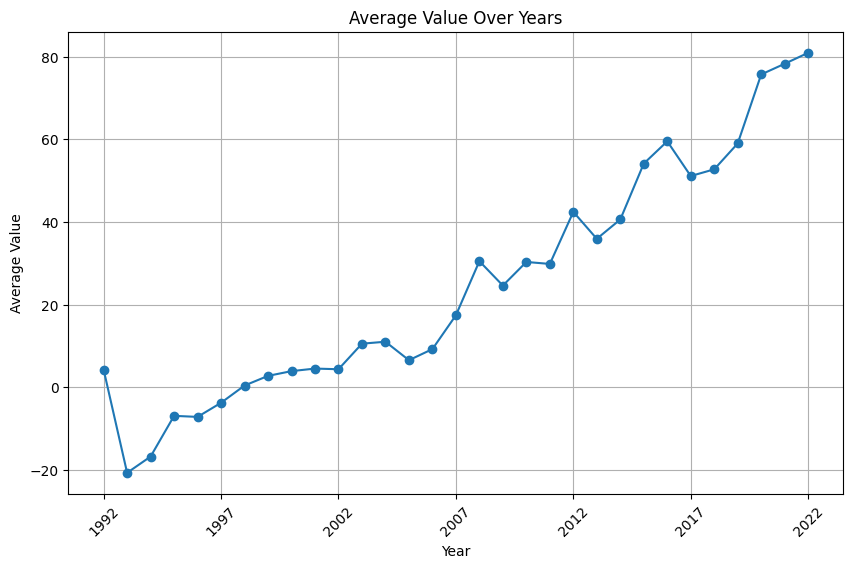

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_year_data.index, grouped_year_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_year_data.index[::5], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

In [18]:
df['Day'] = df['Date'].str[1:] #Création de la colonne 'Day'
df['Day'] = pd.to_datetime(df['Day'], format='%m/%d/%Y')
grouped_day_data = df.groupby('Day')['Value'].mean() #Regroupement des valeurs en une moyenne du changement du niveau de la mer par année. 

df_sorted = grouped_day_data.sort_index()
df_sorted

Day
1992-12-17      6.387727
1992-12-18      1.203333
1992-12-26     35.844444
1992-12-27    -13.436667
1992-12-28    -51.910000
                 ...    
2022-10-29    171.335000
2022-10-30    106.841111
2022-10-31    128.906000
2022-11-07    125.780000
2022-11-08     59.353265
Name: Value, Length: 3653, dtype: float64

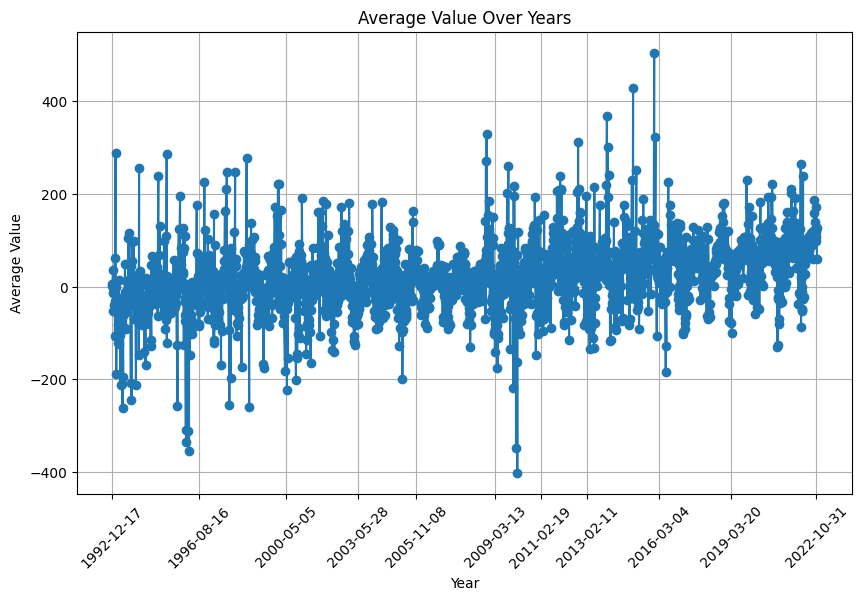

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_day_data.index, grouped_day_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value Over Years')
plt.grid(True)
plt.xticks(grouped_day_data.index[::365], rotation=45)  # Rotation de l'axe x pour une meilleure lisibilité
plt.show()

# Valeurs manquantes

In [20]:
df.isnull().sum().sum()

0

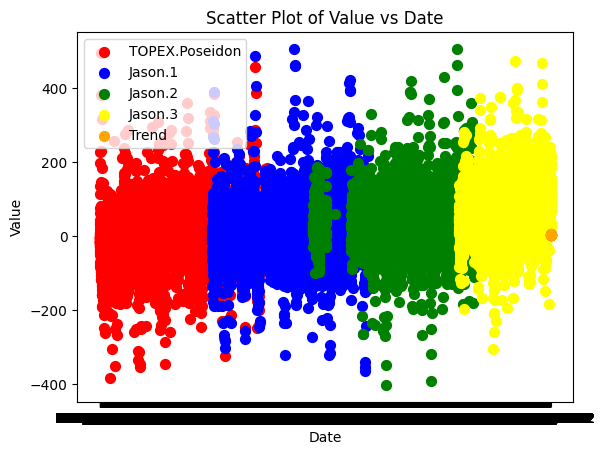

In [21]:
indicator_colors = {
    'TOPEX.Poseidon': 'red',
    'Jason.1' : 'blue',
    'Jason.2' : 'green',
    'Jason.3' : 'yellow',
    'Trend' : 'orange'
}

# Create a scatter plot
for indicator, color in indicator_colors.items():
    plt.scatter(df[df['Indicator'] == indicator]['Date'], 
                df[df['Indicator'] == indicator]['Value'], 
                label=indicator, 
                color=color,
                s=50)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Value vs Date')
plt.legend()

# Show plot
plt.show()

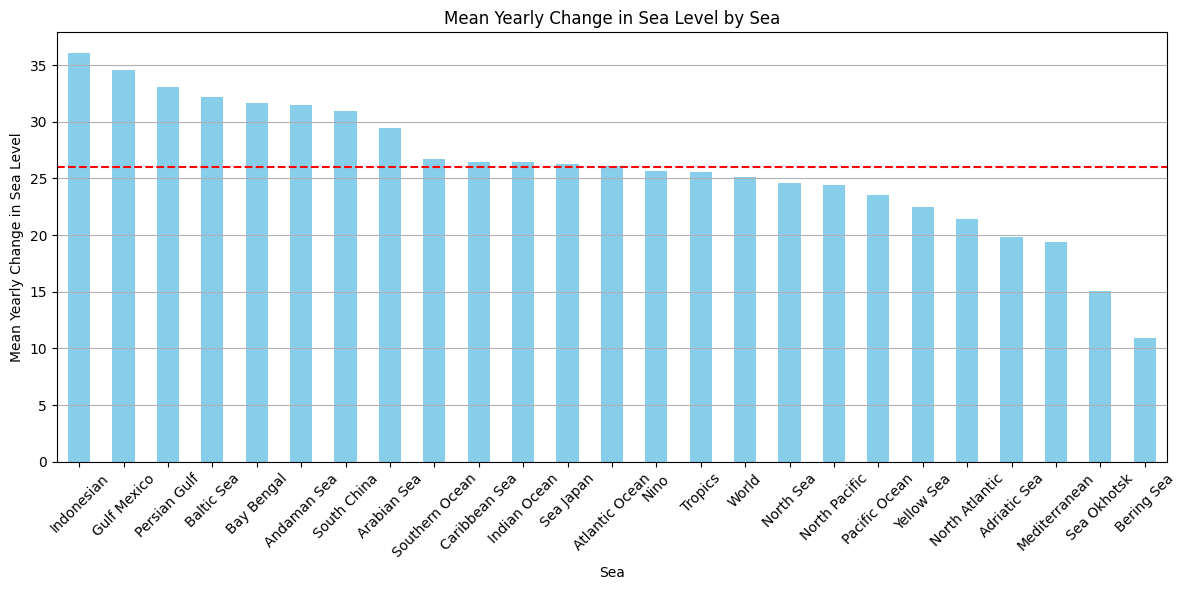

In [22]:
mean_sea_level_per_country = change_in_mean_sea_level_df.groupby('Measure')['Value'].mean().sort_values(ascending=False)

overall_mean_sea_level = df['Value'].mean()

# Plotting the histogram
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
mean_sea_level_per_country.plot(kind='bar', color='skyblue', label='Mean Sea Level Change by Sea')
plt.axhline(y=overall_mean_sea_level, color='red', linestyle='--', label='Overall Mean Sea Level Change')
plt.xlabel('Sea')
plt.ylabel('Mean Yearly Change in Sea Level')
plt.title('Mean Yearly Change in Sea Level by Sea')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()